One of the biggest reasons athletes make so much money is that we love to watch their games. In this task, I will take you through a Data Science project on the Highest-Paid Athletes Analysis with Python.

### Highest-Paid Athletes Analysis with Python
I will start this task of analyzing the highest-paid athletes by importing the necessary Python libraries and the dataset:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
plt.style.use("seaborn-pastel")

df = pd.read_excel(r"C:\Users\SHREE\Downloads\Python CODES\Highest-Paid Athletes Analysis with Python\Forbes Athlete List 2012-2019.xlsx")
df.head()

,Rank,Name,Pay,Salary/Winnings,Endorsements,Sport,Year
0,#1,Lionel Messi,$127 M,$92 M,$35 M,Soccer,2019
1,#2,Cristiano Ronaldo,$109 M,$65 M,$44 M,Soccer,2019
2,#3,Neymar,$105 M,$75 M,$30 M,Soccer,2019
3,#4,Canelo Alvarez,$94 M,$92 M,$2 M,Boxing,2019
4,#5,Roger Federer,$93.4 M,$7.4 M,$86 M,Tennis,2019


So the dataset contains 7 columns and 795 rows, let me describe the data in short:

- Rank: annual ranking based on salary
- Name: athlete’s name
- Pay: salary and endorsement are chargeable
- Salary / Winnings: Athlete’s salary
- Endorsements: revenue from advertising, social media, sponsors, etc.
- Sport: Type of athlete’s sport
- Year: Year of payroll

The dataset we are using is from Forbes. Some columns are not consistent across the dataset because Forbes changed their mind about whether to put “#” before the rank value over time. Let’s fix this one and remove the “dollar signs” and “M”. Let’s also change “Soccer” to “Football” and “Football” to “American Football”:

In [2]:
df.Rank = df.Rank.apply(lambda x: int(x.split("#")[1]) if type(x) == np.str else x)
df.Pay = df.Pay.apply(lambda x: float(x.split(" ")[0].split("$")[1]))
df.Endorsements = df.Endorsements.apply(lambda x: float(x.split(" ")[0].split("$")[1]))
df["Salary/Winnings"].replace("-",'$nan M',inplace=True)
df["Salary/Winnings"] = df["Salary/Winnings"].apply(lambda x: float(x.split(" ")[0].split("$")[1]))
df.Sport.replace({"Soccer":"Football",
                  "Football":"American Football",
                 "Mixed Martial Arts":"MMA",
                 "Auto racing":"Racing",
                  "Auto Racing":"Racing",
                  "Basketbal":"Basketball",
                 },inplace=True)

df.columns = ['Rank', 'Name', 'Pay', 'Salary_Winnings', 'Endorsements', 'Sport', 'Year']

C:\Users\SHREE\AppData\Local\Temp/ipykernel_1680/3459164684.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.Rank = df.Rank.apply(lambda x: int(x.split("#")[1]) if type(x) == np.str else x)


Now let’s see the breakdown of athletes in the data set based on their sport type:

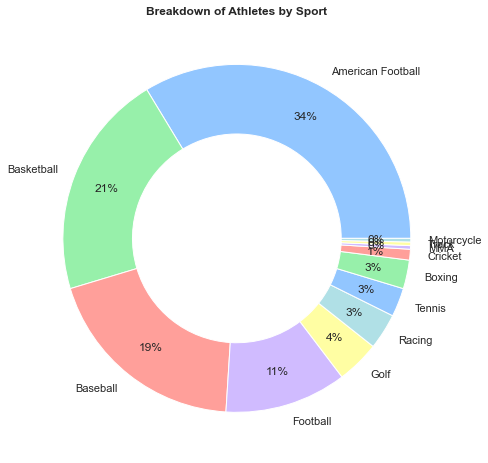

In [3]:
df.groupby("Name").first()["Sport"].value_counts().plot(kind="pie",autopct="%.0f%%",figsize=(8,8),wedgeprops=dict(width=0.4),pctdistance=0.8)
plt.ylabel(None)
plt.title("Breakdown of Athletes by Sport",fontweight="bold")
plt.show()

### Racing Bar Animation for Highest-Paid Athletes Analysis with Python

Let’s visualize the cumulative pays of the athletes in a running bar animation. First, we’ll convert the year column to a DateTime object:

In [4]:
df.Year = pd.to_datetime(df.Year,format="%Y")

Next, prepare a pivot table where the columns are the athletes and the index is the years:

In [5]:
racing_bar_data = df.pivot_table(values="Pay",index="Year",columns="Name")

The athletes mentioned below are the only ones who are consistently included in the Top100 list for each year since 2012. The rest of the athletes have NaN values. We will first interpolate the NaNs linearly and use the filling of the remaining NaNs with backfilling:

In [6]:
racing_bar_data.columns[racing_bar_data.isnull().sum() == 0]

Index(['Carmelo Anthony', 'Cristiano Ronaldo', 'Dwight Howard',
       'Justin Verlander', 'LeBron James', 'Lionel Messi', 'Phil Mickelson',
       'Rafael Nadal', 'Roger Federer', 'Tiger Woods'],
      dtype='object', name='Name')

Now convert the data to a cumulative payroll sum over several years:

In [7]:
racing_bar_filled = racing_bar_data.interpolate(method="linear").fillna(method="bfill")
racing_bar_filled = racing_bar_filled.cumsum()

Now, let’s oversample the dataset with interpolation (linear) for a smooth transition in the frames of the animation:

In [8]:
racing_bar_filled = racing_bar_filled.resample("1D").interpolate(method="linear")[::7]

### Creating and Saving a Bar Chart Animation with Python
Now let’s import the Python packages needed to create and save animations, and run paths and their elements (lines, bars, texts, etc.). The code below will generate an animation for the 10 highest-paid athletes between 2012 and 2019:

MovieWriter imagemagick unavailable; using Pillow instead.


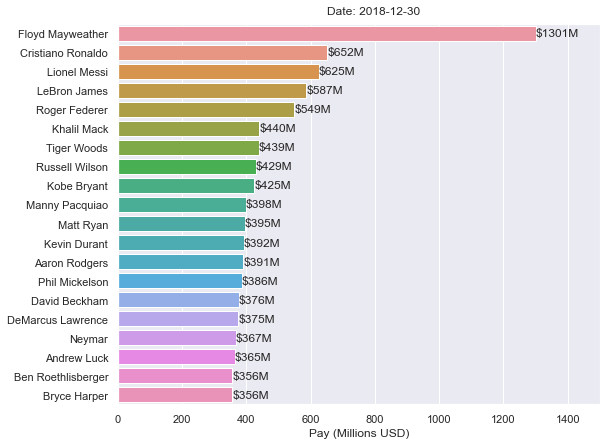

In [10]:
from matplotlib.animation import FuncAnimation, FFMpegWriter

selected  = racing_bar_filled.iloc[-1,:].sort_values(ascending=False)[:20].index
data = racing_bar_filled[selected].round()

fig,ax = plt.subplots(figsize=(9.3,7))
fig.subplots_adjust(left=0.18)
no_of_frames = data.shape[0] #Number of frames

#initiate the barplot with the first rows of the dataframe
bars = sns.barplot(y=data.columns,x=data.iloc[0,:],orient="h",ax=ax)
ax.set_xlim(0,1500)
txts = [ax.text(0,i,0,va="center") for i in range(data.shape[1])]
title_txt = ax.text(650,-1,"Date: ",fontsize=12)
ax.set_xlabel("Pay (Millions USD)")
ax.set_ylabel(None)

def animate(i):
#     print(f"i={i}/{no_of_frames}")
    #get i'th row of data 
    y = data.iloc[i,:]
    
    #update title of the barplot axis
    title_txt.set_text(f"Date: {str(data.index[i].date())}")
    
    #update elements in both plots
    for j, b, in enumerate(bars.patches):
        #update each bar's height
        b.set_width(y[j])
        
        #update text for each bar (optional)
        txts[j].set_text(f"${y[j].astype(int)}M")
        txts[j].set_x(y[j])

anim=FuncAnimation(fig,animate,repeat=False,frames=no_of_frames,interval=1,blit=False)
anim.save('athletes.gif', writer='imagemagick', fps=120)
plt.show(fig)